<H1 style="text-align: center">ECMM422 - Machine Learning</H1>
<H2 style="text-align: center">Assignment 2: Ensemble Methods</H2>



| <font style="font-size:larger;">Date set     | <font style="font-size:larger;">Hand-in date |
|:------------------|:-----------------------------------|
|<font style="font-size:larger;"> 12th February 2020 |<font style="font-size:larger;">**  12 noon, Wednesday 19th February 2020 ** |

</font>

Candidate number:  <font color="red">*660031764*</font>

Marking is anonymous, so please don't write your name or reveal your identity!

This assigment will count for 25% of the module mark.  

Your report should consist of your IPython notebook showing what you did, what was the
result, and what you can conclude from the exercise. Each report will be
assessed on the following criteria:

* Does it record what was done in the exercise?
* Does it permit the results to be reproduced?
* How does the work relate to the theoretical foundations discussed in lectures?
* Is it well presented?

### Submitting the notebooks

Note that an electronic submission is required.  You should also submit the notebook electronically at [electronic hand-in system]( http://empslocal.ex.ac.uk/submit/).  You just need to submit the single .ipynb file that is the notebook, so you should be able to upload it directly from the directory where you have saved it on a University machine or your laptop.  If you're not sure where in your homespace it is, type <code>pwd</code> (print working directory) in a cell to find out where the notebooks are.

<b>Note: you must also submit your cover sheet and E-Submit receipt via BART to complete the submission.</b>


<div class="alert alert-info">
 Although you will undoubtedly work collaboratively in the workshops themselves, these are *individual* exercises.  The reports you write should be about the results *you* obtained, and your attention is drawn to the College and University guidelines on collaboration and plagiarism. 
 </div>

In [137]:
%pylab inline
figsize(15, 10)

# for matrices and numerical methods
import numpy as np

# for plotting functions
import matplotlib.pyplot as plt

# for loading the data we will use
from sklearn import datasets, tree, ensemble

# for KFold cross-validation
from sklearn.model_selection import KFold,train_test_split

# for calculating accuracy, check help(accuracy_score) for details
from sklearn.metrics import accuracy_score

# for finding confusion matrices
from sklearn.metrics import confusion_matrix

# for having progress bars for longer processes, use help(tqdm) for syntax
from tqdm import tqdm

# for providing a random random state (to keep the same kfold splits)
from random import randint

# for timing functions
from time import time

# for making tables/data frames
from pandas import DataFrame

Populating the interactive namespace from numpy and matplotlib


In [138]:
# functions for timing execution 
# eg
tics = []
def tic(): 
    tics.append(time())
def toc(): 
    if tics: 
        return time() - tics.pop()
    else: 
        return None

# Ensemble learning 

In this workshop you will investigate how ensemble of trees perform on a classification task and the importance of the parameters. We will use a digit classification task as an example. 
This will be done in the following stages: 

1. Training a tree on the data and evaluating the bias and variance of the model, using N-fold cross validation. 
2. Comparing performance with a random forest, evaluating the effect of tree depth and forest size
3. Build a boosted collection of trees and evaluate the performance. 

At each stage you should test your code and check the results


### Data: The digits dataset

For this CA you should use the <i>digits</i> data available in <tt>sklearn</tt> as an example (see below).

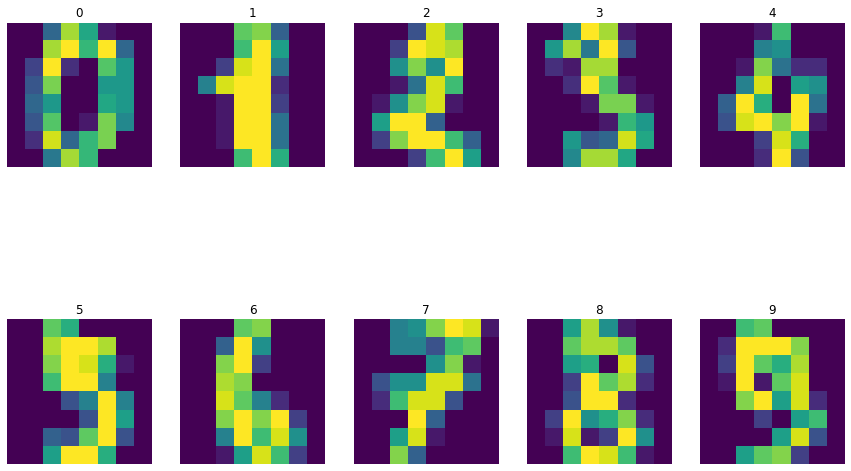

In [139]:
# loading the digit data
(X,Y) = datasets.load_digits(return_X_y=True)

# let's display some examples (the first 10 digits in the dataset)
figure()
for i in range(10): 
    subplot(2,5,i+1)
    imshow(X[i,:].reshape((8,8)))
    title('{}'.format(i))
    axis('off')

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.25)
    


Throughout the workshop, we implement the folds of k fold cross validation using a different randomised seed each time a cell is ran. This means that the folds selected will be the same throughout a cell, so the change in accuracy in the test/validation sets should accurately determine which parameters are better. (As it is not as dependent on the difficulty of the folds because all parameter choices are using the same folds).

Throughout the workshop, we also use sample variance instead of population variance, as we are only taking a sample of the population instead of a whole population. Hence, the variance is calculated by: $$s^2=\sum_{i=1}^n \frac{(x_i-\bar{x})^2}{n-1}$$
And we also use sample standard deviation: $$s=\sqrt{\sum_{i=1}^n \frac{(x_i-\bar{x})^2}{n-1}}$$

### Decision Tree

In this part you are asked to train a decision tree on the digits data. You should use the implementation of the classification tree in sklearn, which allows you to play with the parameters (read the documentation). Read especially on the <i>max_depth</i>, <i>min_samples_split</i> and <i>min_samples_leaf</i> parameters. 
* Draw a graph of the mean and variance of the classification accuracy depending on tree depth - use N-fold cross validation to get these estimates.
<div style="text-align: right"><b>[15 marks]</b></div>

Best performance on the validation sets is with max depth = 19 
	- the mean classification accuracy = 85.151866% 
	- the sample variance of the classification accuracy = 0.701848%²


Text(0, 0.5, 'Sample variance of classification accuracy (%²)')

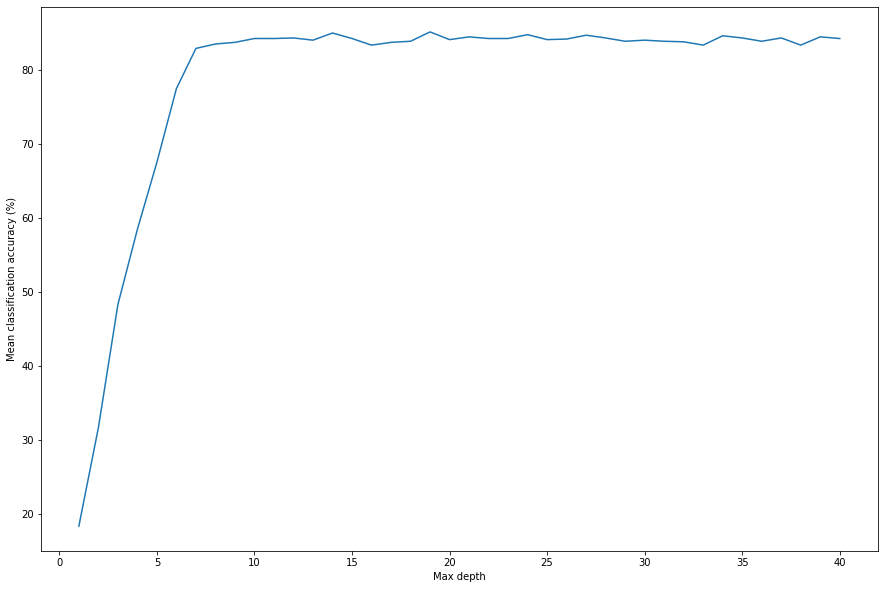

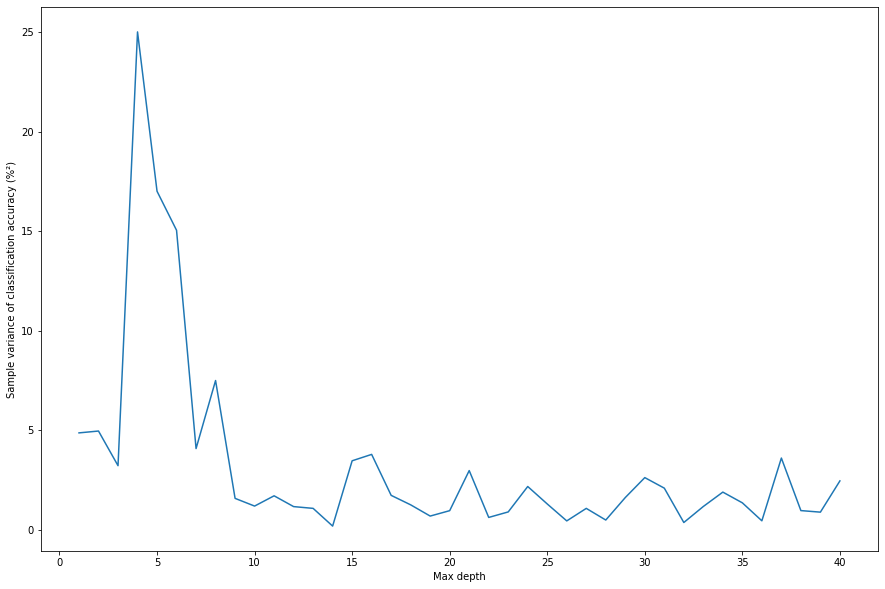

In [140]:
a=randint(0, 2**31)
kfold = KFold(n_splits=5, shuffle=True, random_state=a)  #Kfold

z=41 # maximum max depth + 1
mean_accuracy=[] # arrays for storing things we plot
var_accuracy=[]
max_depths=[]

for depth in range(1,z): # we iterate through the maximal depths
    max_depths.append(depth)
    DTC=tree.DecisionTreeClassifier(max_depth=depth, min_samples_split=2, min_samples_leaf=1) 
    accuracies=[]
    for train, validation in kfold.split(Xtrain):
        DTC.fit(Xtrain[train],Ytrain[train])
        score = DTC.score(Xtrain[validation],Ytrain[validation])  # we train the classifier on every fold and take the mean and variance
        accuracies.append(100*score)
    var_accuracy.append(np.var(accuracies,ddof=1))
    mean_accuracy.append(np.mean(accuracies))
maxIndex = mean_accuracy.index(max(mean_accuracy))
best_max_depth_DTC = max_depths[maxIndex] # we find the best value of max depth
print('Best performance on the validation sets is with max depth = %i \n\t- the mean classification accuracy = %f%% \n\t- the sample variance of the classification accuracy = %f%%\u00b2' % (best_max_depth_DTC, mean_accuracy[maxIndex],var_accuracy[maxIndex]))
#Plotting
plt.plot(max_depths,mean_accuracy)
plt.xlabel('Max depth')
plt.ylabel('Mean classification accuracy (%)')
plt.figure()
plt.plot(max_depths,var_accuracy)
plt.xlabel('Max depth')
plt.ylabel('Sample variance of classification accuracy (%\u00b2)')

We use 5-fold cross validation to get estimates for the mean and the variance of the classification accuracy as the maximum depth parameter changes.

We observe that when the tree depth is low, the classifier is very inaccurate, as at low depths the partitions made are insufficient to classify the validation data. However, as the maximum tree depth is increased, the classifier accuracy increases. This occurs up to a certain point (maximum depth $\approx$ 10) where the classification accuracy reaches a maximum of 80-85% and remains there as the maximum depth is increased further. This is because further partitions of the feature space do not necessarily improve the classifier. In fact, the actual depth used does not exceed around 12-14, so any differences after this point are purely caused by randomness in the fitting process.

The mean classification accuracy can be a maximum at any point from maximum depth $\approx$ 10 to maximum depth = 40. Part of the reason as to why the maximum classification accuracy for this classifier is so low is because decision trees tend to overfit the data. If there is insufficient coverage of the feature space (usually this occurs when the number of samples in the training set is too low) then the quality of classifications in the uncovered regions can be low. This happens as is easy to partition the feature space in such a way that the classifier is very accurate on the training data, but this tree does not necessarily perform well on test and classification data.

We also observe that when the tree depth is extremely low (maximum depth $\approx$ 1), the sample variance of the classifier is low. This is because with a maximum depth of 1, the classifier consistently performs poorly, so we would expect there to be less variance in this case. When maximum tree depth is quite low (~3 to ~6), the variance in performance is extremely high. When the maximum tree depth increases to higher values of depth (roughly 10+) we observe less variance, as the classifier consistently performs well (comparative to the lower values of depth) on the validation set.

* Calculate the confusion matrix for the tree with the best performance. 

<div style="text-align: right"><b>[10 marks]</b></div>

In [141]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Function for plotting the confusion matrix, taken from 
https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

Classification accuracy with max depth = 19 
	- on test set = 85.111111%
Confusion matrix, without normalization
[[38  0  0  0  0  1  0  0  0  0]
 [ 0 39  0  0  2  0  1  0  1  0]
 [ 0  0 40  2  0  0  0  0  3  2]
 [ 0  3  3 30  0  0  0  1  3  1]
 [ 0  1  1  1 41  0  1  0  0  0]
 [ 1  2  0  0  0 39  0  2  1  1]
 [ 0  1  0  1  2  2 39  0  0  0]
 [ 0  1  0  1  0  0  0 38  0  2]
 [ 0  1  4  3  0  1  0  0 36  3]
 [ 0  3  1  2  1  1  0  1  2 43]]


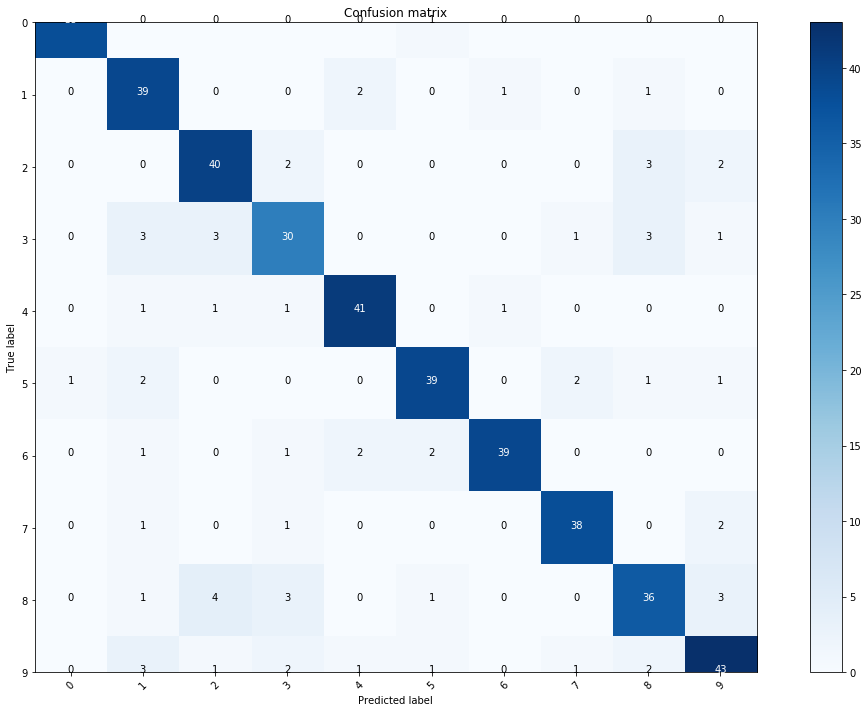

In [142]:
tic()
DTC = tree.DecisionTreeClassifier(max_depth=best_max_depth_DTC, min_samples_split=2, min_samples_leaf=1)
DTC.fit(Xtrain,Ytrain) # we fit the classifier on the whole training set
time_elapsed_DTC = toc() # We find the time to fit the model
test_score = DTC.score(Xtest,Ytest) 
test_accuracy_DTC = 100*test_score # we calculate the accuracy on the test set
print('Classification accuracy with max depth = %i \n\t- on test set = %f%%' % (best_max_depth_DTC, test_accuracy_DTC))
# we predict the classes on the test data
ptest = DTC.predict(Xtest)
cm = confusion_matrix(Ytest, ptest) # we make and plot a confusion matrix
plot_confusion_matrix(cm, np.unique(Ytest))

We typically observe anywhere between 82-89% classification accuracy on the test set.

The types of errors made are not consistently the same. They are highly dependent on the folds of the training and test data selected and the optimum maximum depth chosen.

### Random Forests
In this part, you are asked to use Random Forest using sklearn trees as weak learners. You will use the function provided by sklearn: <tt> sklearn.ensemble.RandomForestClassifier</tt>. 

Once you have coded this, provide a graph of the accuracy curves for different <b>tree depths</b> and <b>forest size</b>: 
* The first graph with the forest size as the $x$-axis, classification error as the $y$-axis.
<div style="text-align: right"><b>[10 marks]</b></div>

Best performance is with forest size = 53 
	- the mean classification accuracy on the validation set = 97.253201%


Text(0, 0.5, 'Mean classification accuracy (%)')

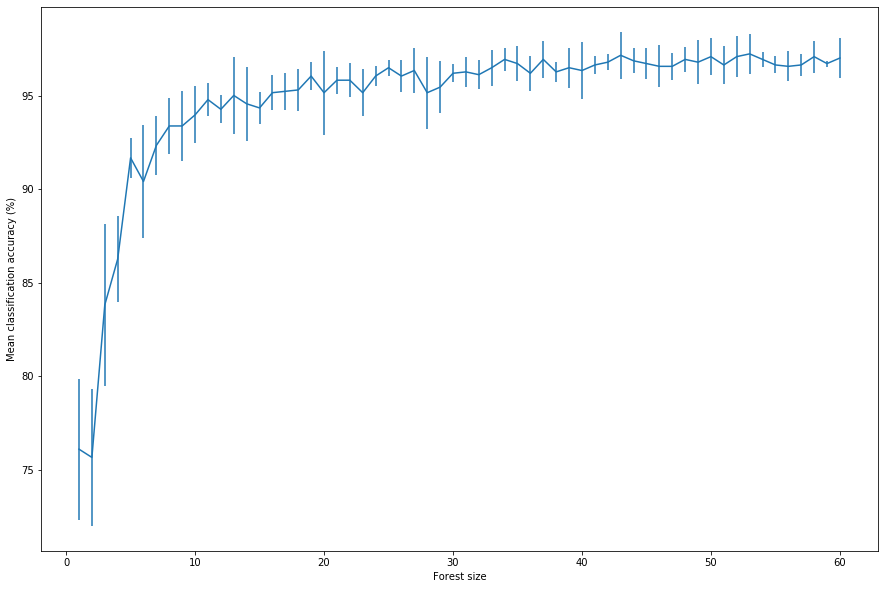

In [143]:
a = randint(0, 2**31)
kfold = KFold(n_splits=5, shuffle=True, random_state=a)  #Kfold

y = 61 # maximum forest size +1
forest_sizes = []
mean_accuracy = []
sd_accuracy = []

for forest_size in range(1,y): # we iterate through all forest sizes
    RFC = ensemble.RandomForestClassifier(max_depth = 10, n_estimators = forest_size)
    forest_sizes.append(forest_size)
    accuracies = []
    for train, validation in kfold.split(Xtrain):
        RFC.fit(Xtrain[train],Ytrain[train]) # we train the classifier on all folds and find the mean and standard deviation
        score = RFC.score(Xtrain[validation],Ytrain[validation])
        accuracies.append(100*score)
    mean_accuracy.append(np.mean(accuracies))
    sd_accuracy.append(np.std(accuracies,ddof=1))
maxIndex = mean_accuracy.index(max(mean_accuracy))

best_forest_size_RFC = forest_sizes[maxIndex] # we find the best value of forest size
print('Best performance is with forest size = %i \n\t- the mean classification accuracy on the validation set = %f%%' % (best_forest_size_RFC, mean_accuracy[maxIndex]))

#Plotting
plt.errorbar(forest_sizes,mean_accuracy, yerr=sd_accuracy)
plt.xlabel('Forest size')
plt.ylabel('Mean classification accuracy (%)')

We use 5-fold cross validation to get estimates for the mean and the standard deviation of the classification accuracy as the forest size parameter changes, for a constant maximum depth = 10.

As forest size is increased, mean classification accuracy also increases. Initially for low values of forest size the classifier is ~75% accurate- this is lower than for 1 decision tree with maximum depth = 10, as each tree node is split on a random subset of features, whereas in the decision tree we use all features. As forest size increases the classification accuracy also increases to a maximum for a forest size of ~30+. The best performance can happen at any forest size after this and typically has around 97-98% classification accuracy, so the classifier is very accurate on the validation set.

This trend is what we expected, as when we add more weak learners (decision trees) to an ensemble method, the classification accuracy of the resulting random forest classifier should increase.

We also observe that the standard deviation between different folds (the error bars) decrease as forest size increases, as random forest classifiers implement a different realisation of the decision tree classifier each time, so by averaging more trees in a forest (increasing forest size) we reduce the standard deviation of the classification accuracy. 

* The second graph with tree depth (eg, for 1,2,5 and 10) as the $x$-axis, classification error as the $y$-axis.
<div style="text-align: right"><b>[10 marks]</b></div>
* Again, use N-Fold cross-validation to plot <b>error bars</b> on your graphs. 
<div style="text-align: right"><b>[10 marks]</b></div>

Best performance is with max depth = 10: 
	- the mean score on the validation set = 97.180779%


Text(0, 0.5, 'Mean classification accuracy (%)')

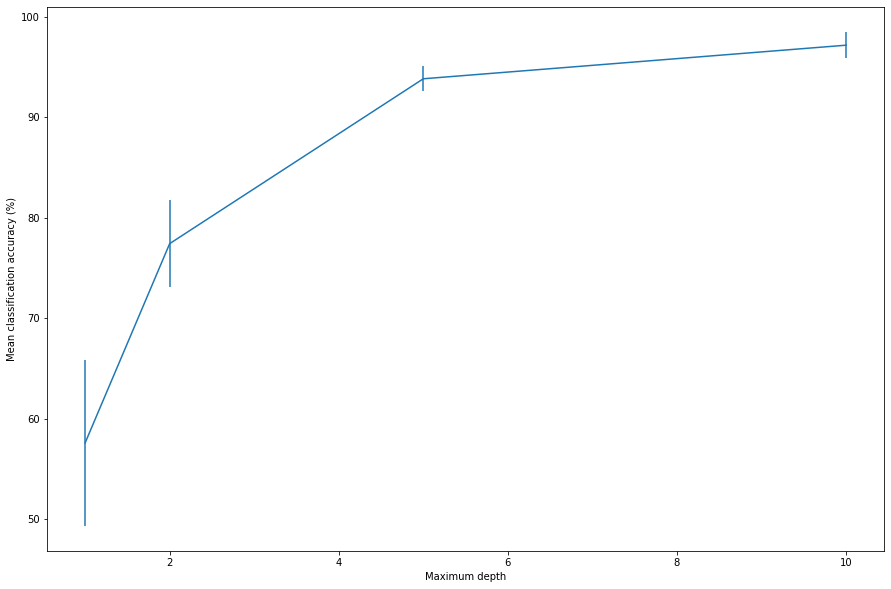

In [144]:
a = randint(0, 2**31)
kfold = KFold(n_splits=5, shuffle=True, random_state=a)  #Kfold

max_depths = [1,2,5,10]
mean_accuracy = []
sd_accuracy = []
for max_depth in max_depths: # we iterate through all max depths
    RFC = ensemble.RandomForestClassifier(max_depth = max_depth, n_estimators = best_forest_size_RFC)
    accuracies = []
    for train, validation in kfold.split(Xtrain): 
        RFC.fit(Xtrain[train],Ytrain[train]) # we fit the model on all folds and find the mean and standard deviation of the accuracies
        score = RFC.score(Xtrain[validation],Ytrain[validation])
        accuracies.append(100*score)
    mean_accuracy.append(np.mean(accuracies))
    sd_accuracy.append(np.std(accuracies,ddof=1))
maxIndex = mean_accuracy.index(max(mean_accuracy))

best_max_depth_RFC = max_depths[maxIndex] # we find the best performing max depth
print('Best performance is with max depth = %i: \n\t- the mean score on the validation set = %f%%' % (best_max_depth_RFC, mean_accuracy[maxIndex]))

#Plotting
plt.errorbar(max_depths,mean_accuracy, yerr=sd_accuracy)
plt.xlabel('Maximum depth')
plt.ylabel('Mean classification accuracy (%)')

We use 5-fold cross validation to get estimates for the mean and the standard deviation of the classification accuracy as the maximum depth parameter changes for a constant forest size (which is the optimum forest size we found before).

Here we see a clear positive non-linear correlation between the maximum depth and the mean classification accuracy. This is because, similarly to the decision tree classifier, at low depths the partitions made are insufficient to classify the validation data. So as we would expect, averaging over many poor performing classifiers still leads to a poor accuracy by the random forest classifier.

We also observe that the standard deviations between different folds (the error bars) tend to decrease as maximum depth increases, as there is a larger variance in performance on the validation set for lower maximum depths. However, when the maximum depth is high ($\approx$ 10) the classifier consistently performs well on the validation set.

* As before, provide the <b>confusion matrix</b> for the forest with best performance. 
<div style="text-align: right"><b>[10 marks]</b></div>

Classification accuracy with max depth = 10 and forest size = 53: 
	- on test set = 96.666667%
Confusion matrix, without normalization
[[39  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  0  1  0]
 [ 0  0  0  0 43  0  0  1  0  1]
 [ 0  0  0  0  0 45  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  1  0]
 [ 0  0  0  0  0  0  0 41  0  1]
 [ 0  0  1  1  0  1  0  0 45  0]
 [ 0  0  0  1  0  0  0  3  2 48]]


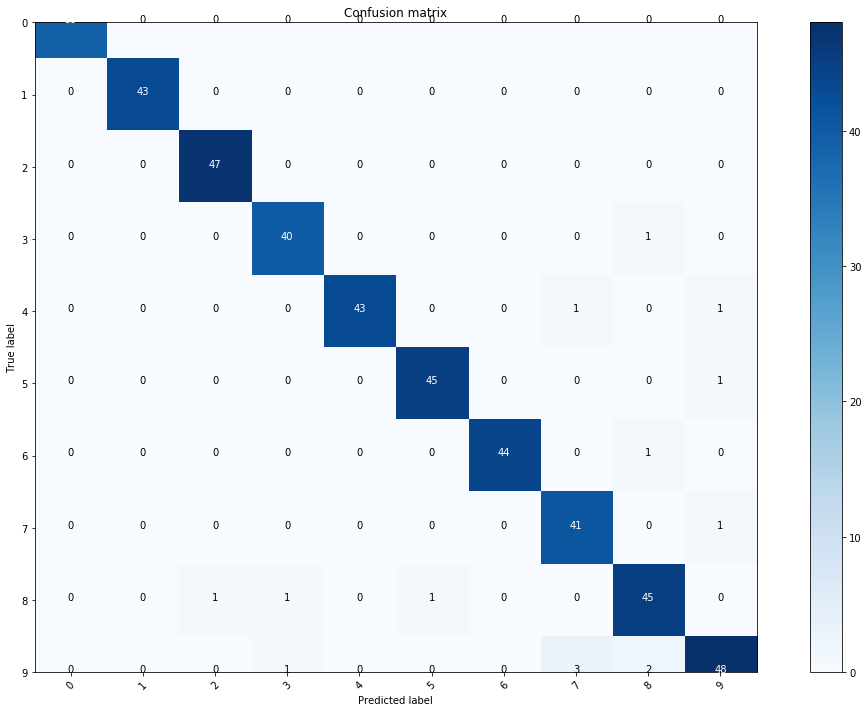

In [145]:
tic()
RFC = ensemble.RandomForestClassifier(max_depth = best_max_depth_RFC, n_estimators = best_forest_size_RFC)
RFC.fit(Xtrain,Ytrain) # we fit the classifier on the whole training set
time_elapsed_RFC = toc() # We find the time to fit the model
test_score = RFC.score(Xtest,Ytest)
test_accuracy_RFC = 100*test_score # we find the test accuracy
print('Classification accuracy with max depth = %i and forest size = %i: \n\t- on test set = %f%%' % (best_max_depth_RFC, best_forest_size_RFC, test_accuracy_RFC))
# we predict the classes on the test data
ptest = RFC.predict(Xtest)
cm = confusion_matrix(Ytest, ptest)
plot_confusion_matrix(cm, np.unique(Ytest))

We typically observe anywhere between 96-99% classification accuracy on the test set.

The types of errors made are not consistently the same, often there are only 1 or 2 types of each error. The types of errors are highly dependent on the folds of the training and test data selected and the optimum maximum depth chosen.

### Boosting
In this last section you are asked to use AdaBooost using sklearn tree stumps (trees with a single non-leaf node) as weak learners. You will use the function provided by sklearn: <tt>sklearn.ensemble.AdaBoostClassifier</tt>
which supports multiclass problems. 

Once you have done this, plot a similar curve as you did before, with boosting rounds as $x$-axis, classification error as $y$-axis and one curve for tree depth of 1,2,5 and 10, using N-Fold cross-validation to obtain error bars.
<div style="text-align: right"><b>[20 marks]</b></div>

Best performance is with maximum depth = 10 and forest size = 52 
	- the mean classification accuracy on the validation set = 98.292992%


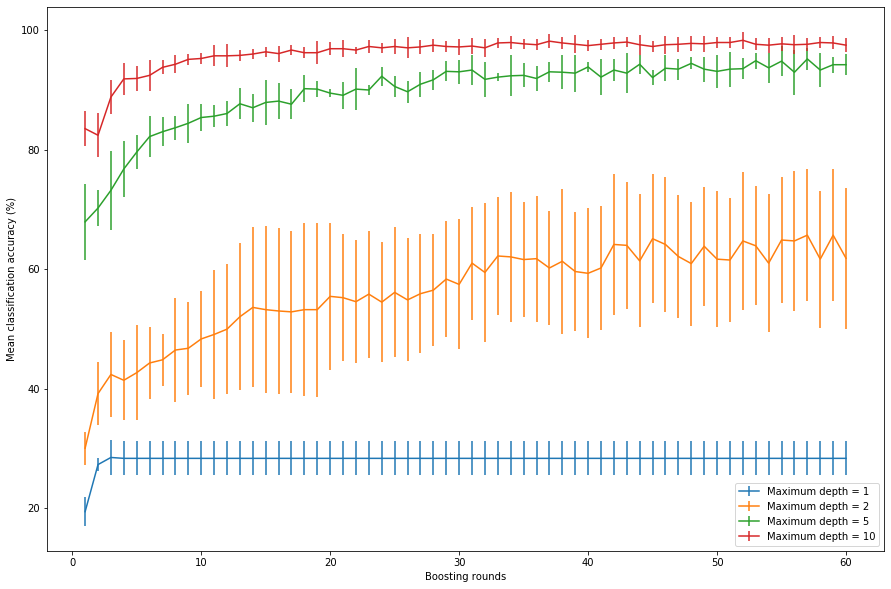

In [146]:
a = randint(0, 2**31)
kfold = KFold(n_splits=5, shuffle=True, random_state=a)  #Kfold

y = 61 # maximum boosting rounds +1
max_depths=[1,2,5,10]
best_mean_accuracy_ABC = 0
for max_depth in max_depths: # we iterate through all max depths
    brs = []
    mean_accuracy = []
    sd_accuracy = []
    for boosting_rounds in range(1,y): # we iterate through all boosting rounds
        brs.append(boosting_rounds)
        ABC = ensemble.AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=max_depth), n_estimators = boosting_rounds)
        accuracies = []
        for train, validation in kfold.split(Xtrain):
            ABC.fit(Xtrain[train],Ytrain[train]) # we fit the classifier on all folds and find the mean and sd of accuracies
            score = ABC.score(Xtrain[validation],Ytrain[validation])
            accuracies.append(100*score)
        mean_accuracy.append(np.mean(accuracies))
        sd_accuracy.append(np.std(accuracies,ddof=1))
    maxIndex = mean_accuracy.index(max(mean_accuracy))
    if mean_accuracy[maxIndex] > best_mean_accuracy_ABC: # we find the best mean accuracy and the corresponding max depth and boosting rounds
        best_boosting_rounds_ABC = brs[maxIndex]
        best_max_depth_ABC = max_depth
        best_mean_accuracy_ABC = mean_accuracy[maxIndex]

    #Plotting
    plt.errorbar(brs,mean_accuracy, yerr=sd_accuracy, label='Maximum depth = '+str(max_depth))
plt.xlabel('Boosting rounds')
plt.ylabel('Mean classification accuracy (%)')
plt.legend(loc='lower right')
print('Best performance is with maximum depth = %i and forest size = %i \n\t- the mean classification accuracy on the validation set = %f%%' % (best_max_depth_ABC, best_boosting_rounds_ABC, best_mean_accuracy_ABC))

We use 5-fold cross validation to get estimates for the mean and the standard deviation of the classification accuracy as the boosting rounds parameter changes, for various values of maximum depth. 

Here we tend to observe an optimum maximum depth of 10, and an optimum boosting rounds for maximum depth = 10 in excess of 30. Similarly to the random forest, this leads to a mean classification accuracy of ~97-99% on the validation set.

Clearly we observe that as maximum depth is increased, the mean classification accuracy is increased. This is because, similarly to the decision tree classifier, at low depths the partitions made are insufficient to classify the validation data. So as we would expect, having a high number of boosting rounds on poor performing classifiers will lead to a poor performing boosted trees classifier.

We observe that the general trend for each maximum depth is that the classification accuracy increases with the number of boosting rounds. For low numbers of boosting rounds the classifier is inaccurate. However, at higher boosting rounds the mean classification accuracy increases. We would expect this result, as boosting works by taking a linear combination of weak predictors (decision trees in our case). Hence, increasing the number of decision trees (boosting rounds) should lead to higher mean classification accuracy.

Taking the average of consistently poor performance classifiers (as in the max depth = 1 case) leads to a lower standard deviation than in the maximum depth = 2 case. This is because the performance is more variable in this case where maximum depth = 2, whilst the classifier consistently performs poorly in the maximum depth = 1 case. As we increase maximum depth further, the standard deviation then decreases, as the classifier performs consistently well.

For higher values (5 and 10) of maximum depth, as boosting rounds increase the standard deviation decreases. The classifier is consistently performing well for higher values of boosting rounds, whilst for lower numbers of boosting rounds the classifier is more variable in its accuracy.

For lower values (1 and 2) of maximum depth the standard deviation increases with an increase of boosting rounds. This is because with low values of boosting rounds the classification accuracy is consistently poor, whilst with a higher number of boosting rounds the performance of the classifier becomes more variable.

Sometimes we have extremely large standard deviations and lower classification accuracy at some boosting rounds values. This is due to the folds in the cross validation. Sometimes a particular fold is especially hard to validate (or the training data is not very representitive of the validation set) for some values of boosting rounds.



Classification accuracy with max depth = 10 and boosting rounds = 52: 
	- on test set = 97.111111%
Confusion matrix, without normalization
[[39  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  1  0  0  0  1]
 [ 0  0 46  1  0  0  0  0  0  0]
 [ 0  1  0 40  0  0  0  0  0  0]
 [ 0  0  0  0 43  0  0  2  0  0]
 [ 0  0  0  0  0 44  0  0  1  1]
 [ 0  0  0  1  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 41  0  1]
 [ 0  0  0  0  1  0  1  0 46  0]
 [ 0  0  0  1  0  0  0  0  0 53]]


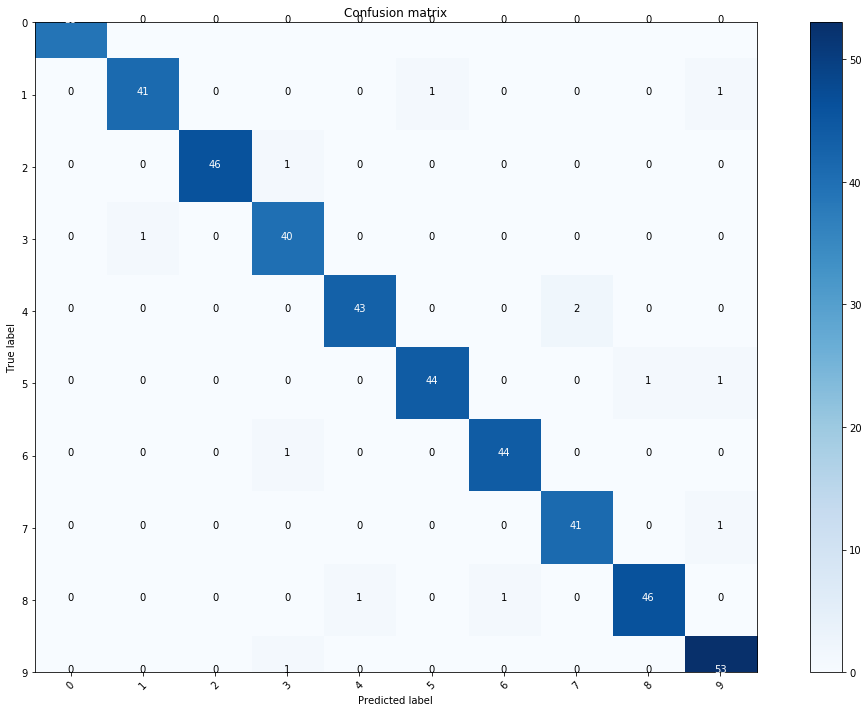

In [147]:
tic()
ABC = ensemble.AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=best_max_depth_ABC), n_estimators = best_boosting_rounds_ABC)
ABC.fit(Xtrain,Ytrain) # we fit the classifier on the whole training set
time_elapsed_ABC = toc() # We find the time to fit the model
test_score = ABC.score(Xtest,Ytest)
test_accuracy_ABC = 100*test_score # we find the accuracy on the test set
print('Classification accuracy with max depth = %i and boosting rounds = %i: \n\t- on test set = %f%%' % (best_max_depth_ABC, best_boosting_rounds_ABC, test_accuracy_ABC))
# we predict the classes on the test data
ptest = ABC.predict(Xtest)
cm = confusion_matrix(Ytest, ptest) # we produce the confusion matrix
plot_confusion_matrix(cm, np.unique(Ytest))

We typically observe anywhere between 97-99% classification accuracy on the test set.

As with the other classifiers, the types of errors made are not consistently the same. The types of errors are highly dependent on the folds of the training and test data selected and the optimum maximum depth chosen.

Finally provide a summary table of the best performance obtained by each algorithm in your experiments (Decision Tree, Random Forest and Boosted Trees), along with the estimated processing time (use the <tt>timeit</tt> package to measure training time). 
<div style="text-align: right"><b>[15 marks]</b></div>

In [148]:
print('For the Decision Tree Classifier with maximum depth = %i'  % (best_max_depth_ABC))
print('For the Random Forest Classifier with maximum depth = %i and forest size = %i' % (best_max_depth_RFC, best_forest_size_RFC))
print('For the Boosted Tree Classifier with maximum depth = %i and boosting rounds = %i' % (best_max_depth_ABC, best_boosting_rounds_ABC))
print()

Employees = {'Classifier': ['Decision Tree','Random Forest','Boosted Trees'],
             'Test Set Accuracy (%)': [test_accuracy_DTC,test_accuracy_RFC,test_accuracy_ABC],
             'Estimated Processing Time (s)': [time_elapsed_DTC,time_elapsed_RFC,time_elapsed_ABC] 
            } # we create a data frame with all the data we want

df = DataFrame(Employees, columns= ['Classifier', 'Test Set Accuracy (%)','Estimated Processing Time (s)'])

print (df)

For the Decision Tree Classifier with maximum depth = 10
For the Random Forest Classifier with maximum depth = 10 and forest size = 53
For the Boosted Tree Classifier with maximum depth = 10 and boosting rounds = 52

      Classifier  Test Set Accuracy (%)  Estimated Processing Time (s)
0  Decision Tree              85.111111                       0.038002
1  Random Forest              96.666667                       0.101006
2  Boosted Trees              97.111111                       0.679039


We see that the decision tree classifier takes by far the shortest time. As random forests and boosted trees use multiple decision tree classifiers in their classification process, it is to be expected that they take longer. The boosted trees classifier takes the longest. This is possibly because it uses all of the features, whilst each decision tree in the random forest classifier learns only from a subset of features, so each individual tree in the forest is faster than those in the boosted trees classifier.

Part of the reason as to why the maximum classification accuracy for the decision tree classifier is so low is because decision trees tend to overfit the data. If there is insufficient coverage of the feature space (usually this occurs when the number of samples in the training set is too low) then the quality of classifications in the uncovered regions can be low. This happens as is easy to partition the feature space such that the classifier is very accurate on the training data. However, the tree does not necessarily perform well on test and classification data.

The decision tree has by far the worst performance on the test set (around 82-89% mean classification accuracy). This is because decision trees tend to overfit the data- if there is insufficient coverage of the feature space (usually this occurs when the number of samples in the training set is too low) then the quality of classifications in the uncovered regions can be low. This happens as is easy to partition the feature space such that the classifier is very accurate on the training data. However, the tree does not necessarily perform well on test and classification data. The mean classification accuracy is more variable for decision trees than for the other classifiers, as ensemble models take an average or a linear combination of many decision trees, which acts to reduce variance.

The random forest classifier typically has the second best performance on the test set (around 96-99% mean classification accuracy). The random forest classifier mitigates weaknesses of the decision tree classifier, as it averages the decision trees, so the effect of overfitting is minimised and hence the mean classification accuracy is maximised.

The best classifier tends to be the boosted trees classifier (around 97-99% mean classification accuracy). The boosted trees classifier also mitigates the weaknesses of the decision tree classifier, as it takes a linear combination of decision trees and weights the more accurate classifiers.
